In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#list of names of all images (named from '1.jpg' to 'n.jpg')
names = []
for i in range(1,9):
    names.append(str(i)+'.jpg')
#all images read into list, grayscale
cars = []
for i in range(0,len(names)):
    cars.append(cv2.imread(names[i], 0))
#all images read into list, color
cars_color = []
for i in range(0,len(names)):
    cars_color.append(cv2.imread(names[i], 1))

In [3]:
#shapes of images
for i in cars:
    print(i.shape)

(207, 385)
(253, 408)
(328, 519)
(440, 687)
(356, 628)
(568, 870)
(648, 836)
(334, 560)


In [4]:
#reshaping to 600x400, gray
cars_r = []
for i in cars:
    r = cv2.resize(i,(600,400))
    cars_r.append(r)
del(cars)
cars = cars_r.copy()
del(cars_r)

In [5]:
#reshaping to 600x400, color
cars_r = []
for i in cars_color:
    r = cv2.resize(i,(600,400))
    cars_r.append(r)
del(cars_color)
cars_color = cars_r.copy()
del(cars_r)

In [6]:
#shapes of images, gray
for i in cars:
    print(i.shape)

(400, 600)
(400, 600)
(400, 600)
(400, 600)
(400, 600)
(400, 600)
(400, 600)
(400, 600)


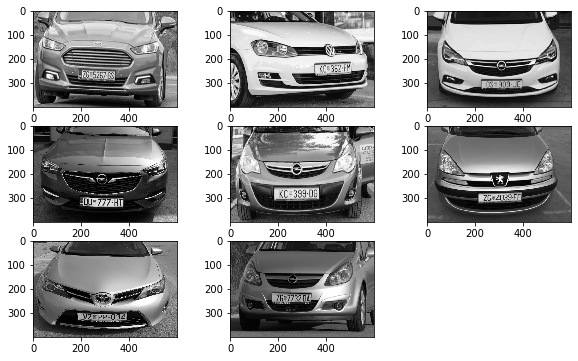

In [7]:
# grayscale images, reshaped to 600x400
#images are mostly similar and have similar licence plate ratio to the rest of image
plt.figure(figsize=(10,6))
for i in range(1,9):
    plt.subplot(3,3,i)
    plt.imshow(cars[i-1], cmap = 'gray')

In [8]:
# reading manually cut licence plate from each reshaped (600x400) car image to get sizes
# list of names of all images (named from 'r0.jpg' to 'rn.jpg')
names = []
for i in range(0,8):
    names.append('r' + str(i) + '.jpg')
#all images read into list
lplates = []
for i in range(0,len(names)):
    lplates.append(cv2.imread(names[i], 0))

In [9]:
#licence plate shapes and ratios
for i in lplates:
    print(i.shape)
    print(i.shape[1]/i.shape[0])

(55, 161)
2.9272727272727272
(61, 157)
2.5737704918032787
(52, 174)
3.3461538461538463
(53, 193)
3.641509433962264
(68, 201)
2.9558823529411766
(49, 186)
3.795918367346939
(46, 210)
4.565217391304348
(54, 170)
3.1481481481481484


In [10]:
#getting resizing values for test licence plate
shape1 = np.arange(150,230,5)
shape2 = np.arange(56,84,1.5)
#shape2 contains floats, converting to ints
shape3 = []
for i in shape2:
    shape3.append(int(i))
del(shape2)
#creating tuples (shape1,shape3) in single list
sizes = zip(shape1,shape3)
del(shape1)
del(shape3)
sizes = list(sizes)
#shapes
print('len:', len(sizes))
print(sizes)
#length and height ratios
for i in sizes:
    print(i[0]/i[1])

len: 16
[(150, 56), (155, 57), (160, 59), (165, 60), (170, 62), (175, 63), (180, 65), (185, 66), (190, 68), (195, 69), (200, 71), (205, 72), (210, 74), (215, 75), (220, 77), (225, 78)]
2.6785714285714284
2.719298245614035
2.711864406779661
2.75
2.7419354838709675
2.7777777777777777
2.769230769230769
2.803030303030303
2.7941176470588234
2.8260869565217392
2.816901408450704
2.8472222222222223
2.8378378378378377
2.8666666666666667
2.857142857142857
2.8846153846153846


In [11]:
#reshaping one target plate to all sizes, thresholded
reg = cv2.imread('reg.jpg', 0)
#grtting thresholded image with otsu binarization
reg_th = cv2.threshold(reg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# list of thresholded plates in all sizes
plates_th = []
for i in range(0, len(sizes)):
    plates_th.append(cv2.resize(reg_th, sizes[i]))

In [12]:
# for viewing template plate in thresh

for i in plates_th:
    cv2.imshow('thresh', i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [13]:
#getting cars in thresh with otsu
cars_th = []
for i in cars:
    cars_th.append(cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

In [14]:
#geting matches of each car with each plate size, thresh
matches = []
#repeats for each car
for i in cars_th:
    #for each car, every licence plate is matched
    for j in range(0,len(plates_th)):
        #CCOEFF method used for matching, gives better results than SQDIFF
        matches.append(cv2.matchTemplate(i, plates_th[j], cv2.TM_CCOEFF))
#all to single list with length of 128 (8 cars x 16 plates)

In [15]:
 #appends location of matched squares to list, inverted to (x,y), for thresh
#minMaxLoc finds maximum for each match
locs = []
for i in range(0, len(matches)):
    locs.append(tuple(cv2.minMaxLoc(matches[i])[3]))
#from 0 to 15(included) is for first car with all plates
#from 16 to 31(included) is for second car with all plates

In [16]:
# each thresh car tested with each plate size
rectangles = []
#for each of 8 cars
for i in range(0,len(cars_th)):
    #car 1
    if i == 0:
        # locs 0 to 15: location within locs for matches of first car and each plate size
        for j in range(0,16):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[i][1]+plates_th[i].shape[0]), (0,255,0), 1))
    #car 2
    elif i == 1:  
        # locs 0 to 15: location within locs for matches of second car and each plate size
        for j in range(16,32):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    elif i == 2:
        for j in range(32,48):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    elif i == 3:
        for j in range(48,64):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    elif i == 4:
        for j in range(64,80):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    elif i == 5:
        for j in range(80,96):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    elif i == 6:
        for j in range(96,112):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))
    if i == 7:
        for j in range(112,128):
            rectangles.append(cv2.rectangle(cars_color[i].copy(), locs[j], (locs[j][0]+plates_th[i].shape[1],locs[j][1]+plates_th[i].shape[0]), (0,255,0), 1))

In [17]:
#seeing what happens
for i in range(0, len(rectangles)):
    cv2.imshow('a', rectangles[i ])
    cv2.waitKey(0)
    cv2.destroyAllWindows()